## Import Modules

In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#cross validation
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

## Features / variables definition

In [4]:
#features
features = rawData.iloc[:,12:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [5]:
#dependent variable
depVar = rawData['default payment next month']

In [6]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [7]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [8]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
29900         0         0         0         0         0         0  
29901         0      6556      3250      1563      1208       781  
29902    168096      6409      7335      4448      4519      5003  
29903     10018     13333        99        99    172104     30013  
29904      2600      4553      5800      2000      1000      1462  


In [9]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default payment next month, dtype: int64

### Feature selection using PCA

In [10]:
#BACKUP of Original Features
X_train_orig = X_train
X_test_orig = X_test
y_train_orig = y_train
y_test_orig = y_test

In [11]:
# Feature Engineering using PCA
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[-1.03563405e+05,  2.29731358e-01, -3.81901189e+03,
        -4.93088078e+03],
       [-9.99370950e+04,  5.50184299e+03, -3.47085476e+03,
        -4.21733610e+03],
       [-6.50434113e+04, -1.45988248e+03, -2.75915382e+03,
        -3.18144156e+03],
       ...,
       [-1.06907116e+05,  3.44847797e+03, -4.53863966e+03,
        -4.92957745e+03],
       [-1.05412917e+05,  7.33163582e+03,  8.87726991e+03,
        -3.60404936e+02],
       [ 1.36936429e+05, -1.23667151e+04, -3.25135485e+03,
        -3.53993891e+03]])

## Cross Validation

In [12]:
from sklearn.cross_validation import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [14]:
X_train.shape, X_test.shape

((750, 4), (250, 4))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 4), (188, 4))

## Sci-Kit Learn Format

In [16]:
from sklearn.linear_model import LinearRegression

## Building Models and choosing the right Model

### Establish variables that you will use for defining each model, and defining Tunning Parameters

In [17]:
#Models
modelSVR = SVR(C=1.0, cache_size=200)
modelNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
modelLR = LogisticRegression(random_state=0, solver='sag')

### Establish a variable specifically for your features

In [18]:
#features
features = rawData.iloc[:,12:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


### Validate that the correct column is being used for the dependent variable:

In [19]:
#dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


### Use the model variables you established in step 2  pass the training data to them in the following format

### Neural Networks

In [20]:
modelNN.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Support Vector Regression

In [21]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Logistic Regression

In [22]:
modelLR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

## Choosing the Right Model

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
print(cross_val_score(modelNN, X_train, y_train)) 

[0.22340426 0.21390374 0.21925134]


### 1. Neural Networks Classifier Model Fitting and Scoring

In [25]:
#Model Fitting
modelNN.fit(X_train,y_train)
print(cross_val_score(modelNN, X_train, y_train))
modelNN.score(X_train,y_train)

[0.22340426 0.21390374 0.21925134]


0.2188612099644128

### 2.Support Vector Machine Classification Model Fitting and Scoring

In [26]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.1581661  -0.0384459  -0.04379561]


0.8482571846128351

### 3. Logistic Regression Model Fitting and Scoring

In [27]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[0.55851064 0.54545455 0.65240642]


0.5818505338078291

### Evaluating the Results

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [29]:
#Make Predictions
predictionNN = modelNN.predict(X_test)
predRsquaredNN = r2_score(y_test,predictionNN)
rmseNN = sqrt(mean_squared_error(y_test, predictionNN))
print('Neural Network - R Squared: %.3f' % predRsquaredNN)
print('Neural Network - RMSE: %.3f' % rmseNN)

y_pred = predictionNN
y_true = y_test
accuracy_score(y_true, y_pred)



Neural Network - R Squared: -3.124
Neural Network - RMSE: 0.860


0.26063829787234044

In [37]:
predictionSVR = modelSVR.predict(X_test)
predRsquaredSVR = r2_score(y_test,predictionSVR)
rmseSVR = sqrt(mean_squared_error(y_test, predictionSVR))
print('Support Vector Classification - R Squared: %.3f' % predRsquaredSVR)
print('Support Vector Classification - RMSE: %.3f' % rmseSVR)

y_pred = predictionSVR
y_true = y_test
accuracy_score(y_true, y_pred, normalize = False)

Support Vector Classification - R Squared: -0.019
Support Vector Classification - RMSE: 0.427


NameError: name 'numpy' is not defined

In [31]:
predictionLR = modelLR.predict(X_test)
predRsquaredLR = r2_score(y_test,predictionLR)
rmseLR = sqrt(mean_squared_error(y_test, predictionLR))
print('Logistic Regression - R Squared: %.3f' % predRsquaredLR)
print('Logistic Regression - RMSE: %.3f' % rmseLR)

y_pred = predictionLR
y_true = y_test
accuracy_score(y_true, y_pred)

Logistic Regression - R Squared: -2.086
Logistic Regression - RMSE: 0.744


0.44680851063829785

###  Plotting the Results

### Neural Network Plot

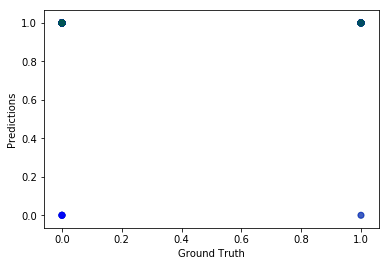

In [32]:
plt.scatter(y_test, predictionNN, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Support Vector Classification Plot

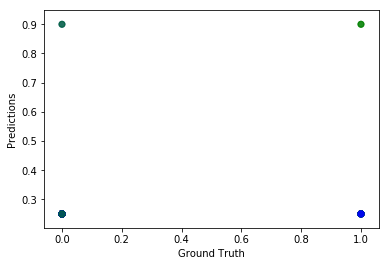

In [33]:
plt.scatter(y_test, predictionSVR, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Logistic Regression Plot

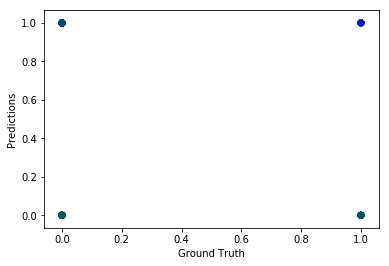

In [34]:
plt.scatter(y_test, predictionLR, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();